<a href="https://colab.research.google.com/github/sahaaj/Technocolabs/blob/main/Activity_3_Exploring_Bitcoin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3: Exploring Bitcoin Dataset
We explore the Bitcoin dataset in this Jupyter Notebook.

## Introduction

In [9]:
#  Import required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#  Import our custom set of normalization functions
import normalizations

In [3]:
#  Load the dataset as a pandas DataFrame
bitcoin = pd.read_csv('bitcoin_historical_prices.csv')

#  Change `date` column to datetime type
bitcoin['date'] = pd.to_datetime(bitcoin['date'])
bitcoin.head()

,date,iso_week,open,high,low,close,volume,market_capitalization
0,2013-04-28,2013-17,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,2013-17,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,2013-17,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,2013-17,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,2013-17,116.38,125.60,92.28,105.21,NaN,1.292190e+09


## Exploration

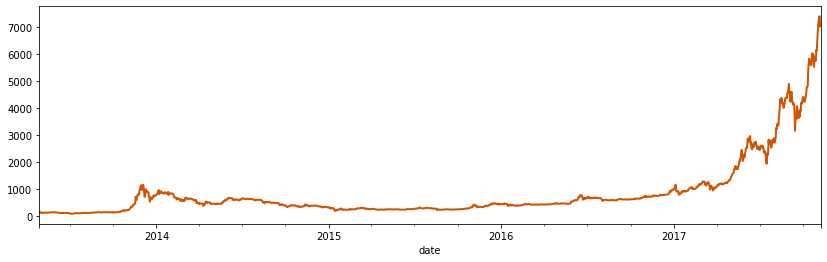

In [4]:
#  Time-series plot for `close` variable
bitcoin.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

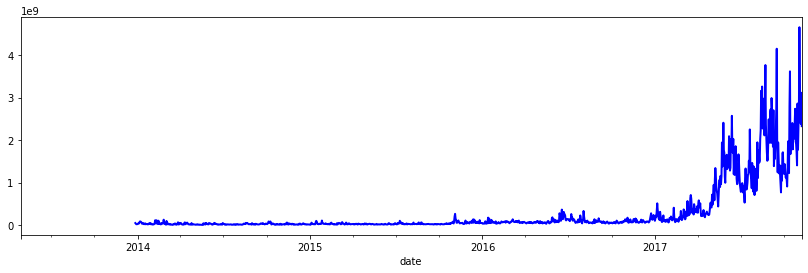

In [6]:
#  TASK:
#  Make a time-series plot for `volume` variable here.
bitcoin.set_index('date')['volume'].plot(linewidth=2, figsize=(14, 4), color='blue');

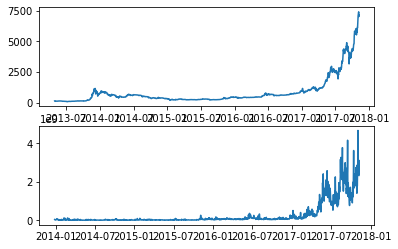

In [13]:
#  TASK:
#  How different is the volume data compared to the closing prices every day?
fig,(a1,a2)=plt.subplots(2)

a1.plot(bitcoin['date'].values,bitcoin['close'].values)
a2.plot(bitcoin['date'].values,bitcoin['volume'].values)

## Preparing Dataset for Model

In [18]:
# Filter for newer or equal to Jan 1, 2016
bitcoin_recent = bitcoin[bitcoin['date'] >= '2016-01-01']

In [19]:
#  Keep only the `close` and `volume` variables
bitcoin_recent = bitcoin_recent[['date', 'iso_week', 'close', 'volume']]

In [20]:
#  Normalize our data for the the `close` variable.
bitcoin_recent['close_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['close'].apply(lambda x: normalizations.point_relative_normalization(x))

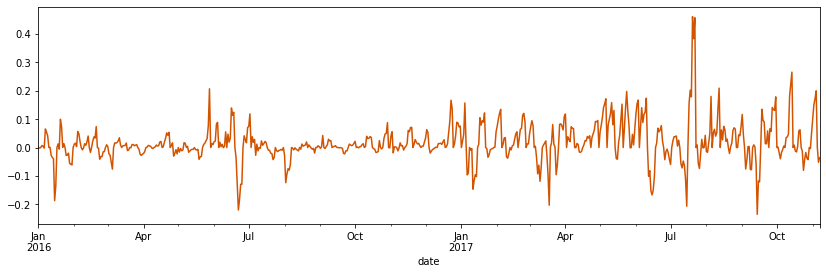

In [21]:
#  Plot for normalized variable `close_point_relative_normalization`
bitcoin_recent.set_index('date')['close_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

In [23]:
#  TASK:
#  Normalize our data for the the `volume` variable.
#  Use the name: `volume_point_relative_normalization
bitcoin_recent['volume_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['volume'].apply(lambda x: normalizations.point_relative_normalization(x))

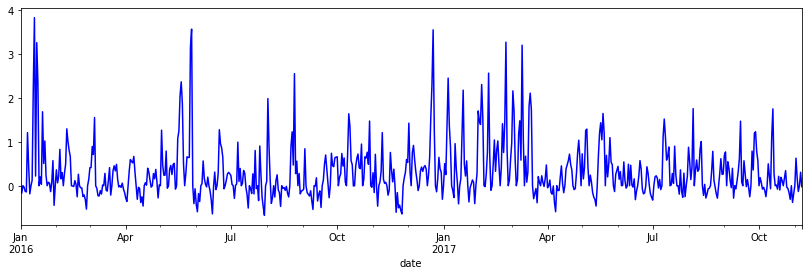

In [25]:
#  TASK:
#  Plot for normalized variable `volume_point_relative_normalization` 
#  in the same way as above
bitcoin_recent.set_index('date')['volume_point_relative_normalization'].plot(figsize=(14, 4), color='blue');

## Training and Test Sets

In [26]:
#  Use the last 20% of available weeks as a test set and the first 80% as a training set.
boundary = int(0.8 * bitcoin_recent['iso_week'].nunique())
train_set_weeks = bitcoin_recent['iso_week'].unique()[0:boundary]
test_set_weeks = bitcoin_recent[~bitcoin_recent['iso_week'].isin(train_set_weeks)]['iso_week'].unique()

print(train_set_weeks)
print(test_set_weeks)

['2016-00' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2016-13'
 '2016-14' '2016-15' '2016-16' '2016-17' '2016-18' '2016-19' '2016-20'
 '2016-21' '2016-22' '2016-23' '2016-24' '2016-25' '2016-26' '2016-27'
 '2016-28' '2016-29' '2016-30' '2016-31' '2016-32' '2016-33' '2016-34'
 '2016-35' '2016-36' '2016-37' '2016-38' '2016-39' '2016-40' '2016-41'
 '2016-42' '2016-43' '2016-44' '2016-45' '2016-46' '2016-47' '2016-48'
 '2016-49' '2016-50' '2016-51' '2016-52' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2017-13' '2017-14' '2017-15' '2017-16' '2017-17'
 '2017-18' '2017-19' '2017-20' '2017-21' '2017-22' '2017-23' '2017-24'
 '2017-25']
['2017-26' '2017-27' '2017-28' '2017-29' '2017-30' '2017-31' '2017-32'
 '2017-33' '2017-34' '2017-35' '2017-36' '2017-37' '2017-38' '2017-39'
 '2017-40' '2017-41' '2017-42' '2017-43' '2017-44' '2017-45']


In [27]:
#  Create train dataset
train_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(train_set_weeks)]

In [28]:
#  TASK:
#  Create test dataset by performing the same operation as above.
#  Use the `test_set_weeks` list to create the variable `test_dataset`.
#
test_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(test_set_weeks)]

## Storing Output

In [29]:
bitcoin_recent.to_csv('bitcoin_recent.csv', index=False)
train_dataset.to_csv('train_dataset.csv', index=False)
test_dataset.to_csv('test_dataset.csv', index=False)